In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import datetime
from datetime import date

In [2]:
train = pd.read_csv(r'train.csv')

In [3]:
train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [4]:
train.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
customer_id                     36992 non-null object
Name                            36992 non-null object
age                             36992 non-null int64
gender                          36992 non-null object
security_no                     36992 non-null object
region_category                 31564 non-null object
membership_category             36992 non-null object
joining_date                    36992 non-null object
joined_through_referral         36992 non-null object
referral_id                     36992 non-null object
preferred_offer_types           36704 non-null object
medium_of_operation             36992 non-null object
internet_option                 36992 non-null object
last_visit_time                 36992 non-null object
days_since_last_login           36992 non-null int64
avg_time_spent                  36992 non-null float64
avg_transaction_value       

In [6]:
train.nunique()

customer_id                     36992
Name                            36992
age                                55
gender                              3
security_no                     36992
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             3
referral_id                     11359
preferred_offer_types               3
medium_of_operation                 4
internet_option                     3
last_visit_time                 30101
days_since_last_login              27
avg_time_spent                  25961
avg_transaction_value           36894
avg_frequency_login_days         1654
points_in_wallet                23699
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    6
dtype: int64

In [7]:
train.drop(train[train['joined_through_referral'] == '?'].index, inplace = True)

In [8]:
train.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 4627
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            245
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                2939
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [9]:
train['region_category'].head()

0    Village
2       Town
3       City
4       City
5       City
Name: region_category, dtype: object

In [10]:
train['region_category'].unique()

array(['Village', 'Town', 'City', nan], dtype=object)

In [11]:
train['region_category'] = train['region_category'].replace(np.nan, 'not given', regex=True)

In [12]:
train['region_category'].unique()

array(['Village', 'Town', 'City', 'not given'], dtype=object)

In [13]:
train['region_category'].describe()

count     31554
unique        4
top        Town
freq      12019
Name: region_category, dtype: object

In [14]:
train['preferred_offer_types'].head()

0       Gift Vouchers/Coupons
2       Gift Vouchers/Coupons
3       Gift Vouchers/Coupons
4    Credit/Debit Card Offers
5       Gift Vouchers/Coupons
Name: preferred_offer_types, dtype: object

In [15]:
train['preferred_offer_types'].unique()

array(['Gift Vouchers/Coupons', 'Credit/Debit Card Offers',
       'Without Offers', nan], dtype=object)

In [16]:
train[train['preferred_offer_types'].isnull()].head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
94,fffe43004900440034003200320039003100,Kiyoko Varnell,48,M,0FXRTQ3,City,No Membership,2015-03-27,Yes,CID29095,...,960.62,13954.02,17.0,631.15,No,Yes,Yes,Solved,Poor Customer Service,4
457,fffe43004900440032003300300036003600,Lavern Southwick,49,F,ITDY1DO,Town,Basic Membership,2016-09-18,No,xxxxxxxx,...,31.93,24009.29,6.0,618.05,Yes,No,Yes,No Information Available,Poor Product Quality,5
470,fffe43004900440032003900390034003100,Glendora Bruneau,24,M,VXZV1O3,Village,Platinum Membership,2016-08-17,Yes,CID7943,...,215.35,65188.06,8.0,778.26,No,Yes,No,Not Applicable,Reasonable Price,2
505,fffe43004900440032003000360032003700,Jennell Eden,38,M,UII0IBJ,City,Platinum Membership,2016-03-25,Yes,CID57762,...,31.64,38649.06,9.0,759.73,Yes,No,No,Not Applicable,Too many ads,3
650,fffe43004900440032003100350037003500,Sheron Goya,53,F,BAH1X9U,Town,Gold Membership,2017-01-24,No,xxxxxxxx,...,84.43,30761.37,1.7605586540274558,712.28,No,Yes,No,Not Applicable,Poor Customer Service,-1


In [17]:
train['preferred_offer_types'].value_counts()/36992

Gift Vouchers/Coupons       0.284926
Credit/Debit Card Offers    0.282710
Without Offers              0.278736
Name: preferred_offer_types, dtype: float64

In [18]:
train[['preferred_offer_types','used_special_discount']].head(20) 

,preferred_offer_types,used_special_discount
0,Gift Vouchers/Coupons,Yes
2,Gift Vouchers/Coupons,No
3,Gift Vouchers/Coupons,No
4,Credit/Debit Card Offers,No
5,Gift Vouchers/Coupons,Yes
6,Gift Vouchers/Coupons,Yes
8,Without Offers,Yes
9,Gift Vouchers/Coupons,No
10,Gift Vouchers/Coupons,Yes
11,Gift Vouchers/Coupons,Yes


In [19]:
train[['preferred_offer_types','offer_application_preference']].head(20)

,preferred_offer_types,offer_application_preference
0,Gift Vouchers/Coupons,Yes
2,Gift Vouchers/Coupons,Yes
3,Gift Vouchers/Coupons,Yes
4,Credit/Debit Card Offers,Yes
5,Gift Vouchers/Coupons,No
6,Gift Vouchers/Coupons,No
8,Without Offers,No
9,Gift Vouchers/Coupons,Yes
10,Gift Vouchers/Coupons,Yes
11,Gift Vouchers/Coupons,No


In [20]:
train.dropna(subset=['preferred_offer_types'], inplace=True)

In [21]:
train.reset_index(inplace = True,drop=True)

In [22]:
train['preferred_offer_types'].unique()

array(['Gift Vouchers/Coupons', 'Credit/Debit Card Offers',
       'Without Offers'], dtype=object)

In [23]:
#points_in_wallet
train['points_in_wallet'].describe()

count    28391.000000
mean       686.709264
std        193.663447
min       -760.661236
25%        615.905000
50%        697.550000
75%        764.120000
max       2069.069761
Name: points_in_wallet, dtype: float64

In [24]:
train.loc[train['points_in_wallet']<0]

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
56,fffe43004900440035003200370036003800,Hal Hagood,28,M,DL6BE96,Village,Basic Membership,2017-10-29,No,xxxxxxxx,...,457.330000,20883.28,14.0,-549.357498,No,Yes,No,Not Applicable,Too many ads,5
59,fffe43004900440034003600300037003000,Jena Scherrer,59,F,A3SG5HG,Town,No Membership,2017-06-08,Yes,CID8099,...,207.520000,12556.28,10.0,-44.597633,No,Yes,No,Not Applicable,No reason specified,4
182,fffe43004900440032003100380037003400,Solomon Finnell,42,F,EDXS9Z3,City,Gold Membership,2016-03-28,Yes,xxxxxxxx,...,179.840000,39667.91,10.0,-38.084314,No,Yes,No,Not Applicable,Poor Product Quality,3
530,fffe430049004400380030003400,Elke Montag,40,F,8WQX7CZ,City,Premium Membership,2016-09-09,Yes,CID26330,...,104.470000,87823.92,16.0,-301.998780,Yes,No,No,Not Applicable,Reasonable Price,1
713,fffe43004900440032003300340033003800,Sparkle Mccaster,62,M,3R1X5I8,City,Platinum Membership,2016-07-25,Yes,CID44215,...,778.680000,3244.53,8.0,-184.519595,No,Yes,No,Not Applicable,User Friendly Website,1
783,fffe43004900440033003500350030003700,Raina Twiford,44,M,OS2FCU0,Village,Premium Membership,2015-10-30,Yes,CID59542,...,616.580000,37880.16,23.0,-243.016692,No,Yes,No,Not Applicable,Too many ads,3
1109,fffe43004900440036003100320037003200,Bette Szabo,38,F,G3P36X1,not given,Premium Membership,2015-02-06,Yes,CID1041,...,258.650000,45000.76,17.0,-132.423946,Yes,Yes,No,Not Applicable,Poor Website,3
1471,fffe4300490044003800370034003200,Laree Huling,44,F,TPT9MU1,not given,Silver Membership,2016-04-30,Yes,CID59416,...,150.180000,16189.46,6.0,-103.897977,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,3
1624,fffe43004900440033003600340032003200,Hellen Alexis,27,F,881OVCP,City,Basic Membership,2017-02-04,No,xxxxxxxx,...,106.200000,8782.81,23.0,-8.468228,No,Yes,No,Not Applicable,No reason specified,5
2028,fffe43004900440033003700340030003400,Hilary Fludd,61,F,UJVVWG3,Town,No Membership,2015-10-07,Yes,CID4618,...,2350.276357,21019.12,26.0,-67.906205,Yes,Yes,Yes,Solved,Poor Customer Service,4


In [25]:
train['points_in_wallet'] = train['points_in_wallet'].replace(np.nan, '0', regex=True)

In [26]:
train.isnull().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [27]:
train['joining_date'] = pd.to_datetime(train['joining_date'])

In [28]:
train['churn_risk_score'] = np.where(train['churn_risk_score']<0,-(train['churn_risk_score']),train['churn_risk_score'])

# Spliting

In [29]:
#train, temp = train_test_split(train, test_size=0.3, random_state=42, shuffle=False)

In [30]:
train.shape

(31309, 25)

In [31]:
#validation, test = train_test_split(temp, test_size=0.5, random_state=42, shuffle=False)

In [32]:
#train.reset_index(inplace = True,drop=True)
#validation.reset_index(inplace = True,drop=True)
#test.reset_index(inplace = True,drop=True)

In [33]:
#train.head()

In [34]:
#validation.head()

In [35]:
#test.head()

# EDA

### AGE

In [247]:
dummy = pd.DataFrame()
dummy['age'] = train['age']
dummy['churn_risk_score'] = train['churn_risk_score']

In [248]:
dummy.head()

,age,churn_risk_score
0,18,2
1,44,5
2,37,5
3,31,5
4,13,3


In [249]:
dummy['age'].describe()

count    31309.000000
mean        37.104475
std         15.880629
min         10.000000
25%         23.000000
50%         37.000000
75%         51.000000
max         64.000000
Name: age, dtype: float64

In [250]:
dummy['age'].unique()

array([18, 44, 37, 31, 13, 21, 45, 25, 60, 11, 34, 40, 57, 39, 33, 30, 19,
       48, 43, 29, 10, 20, 12, 52, 26, 49, 22, 17, 36, 58, 41, 50, 23, 38,
       35, 32, 28, 53, 55, 59, 54, 62, 51, 24, 56, 42, 27, 14, 46, 64, 61,
       47, 16, 63, 15], dtype=int64)

In [251]:
dummy['age'].value_counts()


16    614
33    614
57    609
60    608
28    607
34    602
42    597
61    595
55    595
45    594
30    591
47    591
21    588
59    588
38    587
48    587
62    586
41    585
32    583
17    583
52    582
56    581
10    576
23    575
58    574
29    573
37    573
14    569
36    567
27    566
53    563
12    559
13    558
49    557
44    556
19    555
26    554
22    554
11    554
64    552
46    552
35    551
43    550
20    550
51    549
15    547
63    547
50    547
25    543
24    533
39    533
18    531
31    530
54    522
40    522
Name: age, dtype: int64

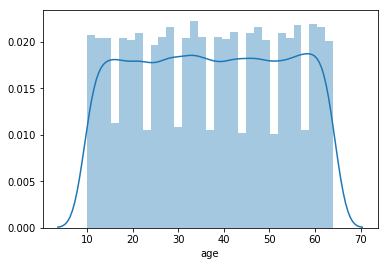

In [252]:
 sns.distplot(dummy['age'])

In [253]:
dummy['log_age'] = np.log(dummy['age'])

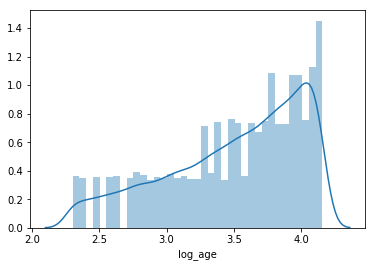

In [254]:
sns.distplot(dummy['log_age'])

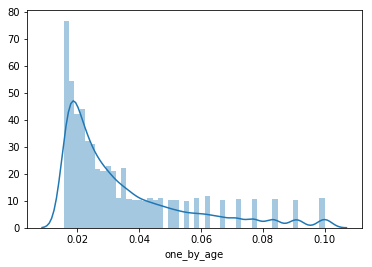

In [255]:
dummy['one_by_age'] = 1/(dummy['age'])
sns.distplot(dummy['one_by_age'])

In [256]:
x2 = stats.boxcox(train['age'])[0]
x3 = pd.Series(x2)
dummy['box_cox_age'] = x3

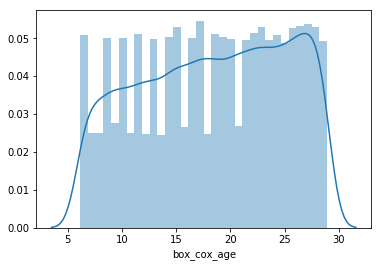

In [257]:
sns.distplot(dummy['box_cox_age'])

In [258]:
dummy.corr()

,age,churn_risk_score,log_age,one_by_age,box_cox_age
age,1.000000,0.000782,0.973157,-0.887809,0.998523
churn_risk_score,0.000782,1.000000,0.000998,-0.000708,0.000860
log_age,0.973157,0.000998,1.000000,-0.968386,0.984128
one_by_age,-0.887809,-0.000708,-0.968386,1.000000,-0.910454
box_cox_age,0.998523,0.000860,0.984128,-0.910454,1.000000


In [259]:
labels = ['1', '2', '3','4','5']

In [260]:
bins = np.linspace(10,70,6)
bins

array([10., 22., 34., 46., 58., 70.])

In [261]:
dummy['bins'] = pd.cut(dummy['age'], bins=bins, labels=labels, include_lowest=True)

In [262]:
dummy['bins'].head()

0    1
1    3
2    3
3    2
4    1
Name: bins, dtype: category
Categories (5, object): [1 < 2 < 3 < 4 < 5]

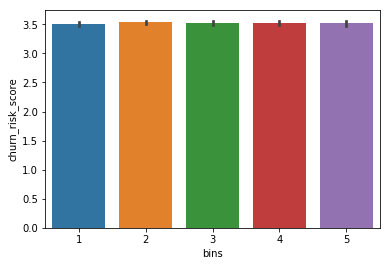

In [263]:
sns.barplot(x='bins',y='churn_risk_score',data=dummy)

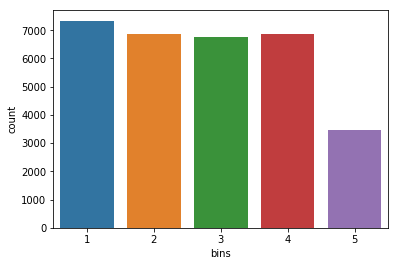

In [264]:
sns.countplot(x=dummy['bins'])

In [267]:
label_encoder = LabelEncoder()
dummy['age_label'] = label_encoder.fit_transform(dummy['bins'])

In [273]:
dummy.groupby(['bins','churn_risk_score'])['churn_risk_score'].count()

bins  churn_risk_score
1     1                    742
      2                    570
      3                   2127
      4                   2021
      5                   1878
2     1                    724
      2                    509
      3                   1892
      4                   1878
      5                   1868
3     1                    719
      2                    501
      3                   1895
      4                   1815
      5                   1837
4     1                    733
      2                    514
      3                   1873
      4                   1926
      5                   1811
5     1                    368
      2                    231
      3                   1016
      4                    945
      5                    916
Name: churn_risk_score, dtype: int64

In [274]:
dummy['age_label'] = dummy['age_label']+1

In [275]:
dummy.corr()

,age,churn_risk_score,log_age,one_by_age,box_cox_age,age_label
age,1.000000,0.000782,0.973157,-0.887809,0.998523,0.975536
churn_risk_score,0.000782,1.000000,0.000998,-0.000708,0.000860,0.002228
log_age,0.973157,0.000998,1.000000,-0.968386,0.984128,0.933139
one_by_age,-0.887809,-0.000708,-0.968386,1.000000,-0.910454,-0.831123
box_cox_age,0.998523,0.000860,0.984128,-0.910454,1.000000,0.970513
age_label,0.975536,0.002228,0.933139,-0.831123,0.970513,1.000000


In [56]:
#target encoding

In [293]:
d1 = dummy.groupby(['bins'])['churn_risk_score'].value_counts()

In [294]:
d1

bins  churn_risk_score
1     3                   2127
      4                   2021
      5                   1878
      1                    742
      2                    570
2     3                   1892
      4                   1878
      5                   1868
      1                    724
      2                    509
3     3                   1895
      5                   1837
      4                   1815
      1                    719
      2                    501
4     4                   1926
      3                   1873
      5                   1811
      1                    733
      2                    514
5     3                   1016
      4                    945
      5                    916
      1                    368
      2                    231
Name: churn_risk_score, dtype: int64

In [283]:
dummy['traget_age'] = dummy['bins'].map(d1)

In [286]:
dummy.head(10)

,age,churn_risk_score,log_age,one_by_age,box_cox_age,bins,age_label,traget_age
0,18,2,2.890372,0.055556,10.340433,1,1,4
1,44,5,3.784190,0.022727,21.508872,3,3,4
2,37,5,3.610918,0.027027,18.721641,3,3,4
3,31,5,3.433987,0.032258,16.226221,2,2,4
4,13,3,2.564949,0.076923,7.809454,1,1,4
5,21,3,3.044522,0.047619,11.773170,1,1,4
6,44,3,3.784190,0.022727,21.508872,3,3,4
7,45,4,3.806662,0.022222,21.897673,3,3,4
8,25,5,3.218876,0.040000,13.606743,2,2,4
9,60,3,4.094345,0.016667,27.500512,5,5,4


In [59]:
# it will became quasi constant

In [60]:
d1 = dummy.groupby('bins')['churn_risk_score'].std().to_dict()

In [61]:
d1

{'10-21': 1.234532356768991,
 '22-33': 1.254314795708946,
 '34-45': 1.2562379567409327,
 '46-57': 1.252733998883575,
 '58-70': 1.2430536351034303}

### GENDER

In [62]:
dummy = pd.DataFrame()
dummy['gender'] = train['gender']
dummy['churn_risk_score'] = train['churn_risk_score']

In [63]:
dummy.head()

,gender,churn_risk_score
0,F,2
1,F,5
2,M,5
3,F,5
4,M,3


In [64]:
dummy['gender'].value_counts()

F          15631
M          15630
Unknown       48
Name: gender, dtype: int64

In [65]:
label_encoder_gender = LabelEncoder()
dummy['gender_label'] = label_encoder_gender.fit_transform(dummy['gender'])

In [66]:
dummy['gender_label'].head()

0    0
1    0
2    1
3    0
4    1
Name: gender_label, dtype: int32

In [67]:
dummy.corr()

,churn_risk_score,gender_label
churn_risk_score,1.000000,-0.002301
gender_label,-0.002301,1.000000


In [68]:
d1 = dummy.groupby('gender')['churn_risk_score'].mean().to_dict()

In [69]:
d1

{'F': 3.5233830209199666,
 'M': 3.5187460012795904,
 'Unknown': 3.3958333333333335}

In [70]:
d1 = train.groupby('gender')['age'].sum().to_dict()

In [71]:
d1

{'F': 580466, 'M': 579509, 'Unknown': 1729}

In [72]:
d1 = dummy.groupby('gender')['churn_risk_score'].agg(np.median)
d1 = d1.to_dict()
d1

{'F': 4, 'M': 4, 'Unknown': 3}

In [73]:
d1 = dummy.groupby('gender')['churn_risk_score'].var()
d1 = d1.to_dict()
d1

{'F': 1.5601537751665941,
 'M': 1.5569778886445123,
 'Unknown': 1.6910460992907799}

In [74]:
dummy['traget_gender'] = dummy['gender'].map(d1)

In [75]:
dummy.corr()

,churn_risk_score,gender_label,traget_gender
churn_risk_score,1.000000,-0.002301,-0.003209
gender_label,-0.002301,1.000000,-0.179163
traget_gender,-0.003209,-0.179163,1.000000


### security_no

In [76]:
train['security_no'].nunique()  #no use

31309

### region_category

In [77]:
train['region_category'].nunique()

4

In [78]:
train['region_category'].unique()

array(['Village', 'Town', 'City', 'not given'], dtype=object)

In [79]:
dummy = pd.DataFrame()
dummy['region_category'] = train['region_category']
dummy['churn_risk_score'] = train['churn_risk_score']

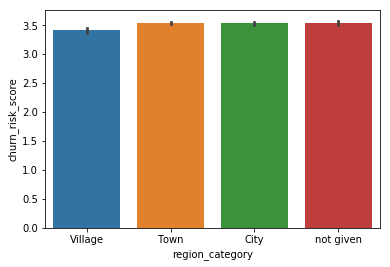

In [80]:
sns.barplot(x='region_category',y='churn_risk_score',data=dummy)

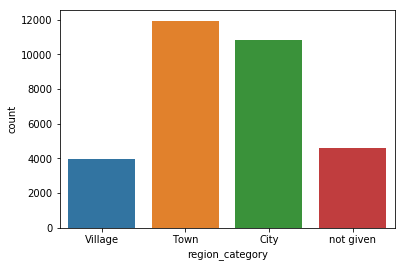

In [81]:
sns.countplot(dummy['region_category'])

In [82]:
label_encoder_region_category = LabelEncoder()
dummy['region_category_label'] = label_encoder_region_category.fit_transform(dummy['region_category'])

In [83]:
dummy.corr()

,churn_risk_score,region_category_label
churn_risk_score,1.000000,-0.009712
region_category_label,-0.009712,1.000000


In [84]:
d1 = dummy.groupby('region_category')['churn_risk_score'].mean().to_dict()

In [85]:
d1

{'City': 3.533814413914331,
 'Town': 3.5378038558256497,
 'Village': 3.4118533400301354,
 'not given': 3.540976460331299}

In [86]:
dummy['traget_region_category'] = dummy['region_category'].map(d1)

In [87]:
dummy.corr()

,churn_risk_score,region_category_label,traget_region_category
churn_risk_score,1.000000,-0.009712,0.033392
region_category_label,-0.009712,1.000000,-0.290842
traget_region_category,0.033392,-0.290842,1.000000


### membership_category

In [88]:
dummy = pd.DataFrame()
dummy['membership_category'] = train['membership_category']
dummy['churn_risk_score'] = train['churn_risk_score']

In [89]:
dummy['membership_category'].nunique()

6

In [90]:
dummy['membership_category'].unique()

array(['Platinum Membership', 'No Membership', 'Gold Membership',
       'Silver Membership', 'Basic Membership', 'Premium Membership'],
      dtype=object)

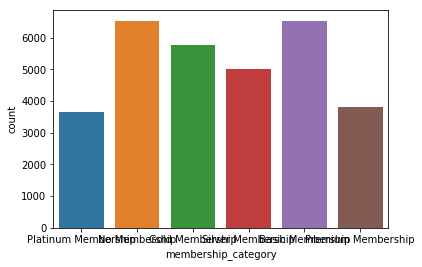

In [91]:
sns.countplot(dummy['membership_category'])

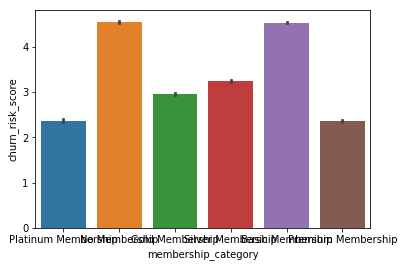

In [92]:
sns.barplot(x='membership_category',y='churn_risk_score',data=dummy)

In [93]:
label_encoder_membership_category = LabelEncoder()
dummy['membership_category_label'] = label_encoder_membership_category.fit_transform(dummy['membership_category'])

In [94]:
dummy.corr()

,churn_risk_score,membership_category_label
churn_risk_score,1.000000,-0.400606
membership_category_label,-0.400606,1.000000


In [95]:
d1 = dummy.groupby('membership_category')['churn_risk_score'].mean().to_dict()

In [96]:
d1

{'Basic Membership': 4.531914893617022,
 'Gold Membership': 2.954230235783634,
 'No Membership': 4.550284047290035,
 'Platinum Membership': 2.3653478854024557,
 'Premium Membership': 2.3559232991857106,
 'Silver Membership': 3.247859844714314}

In [97]:
dummy['traget_membership_category'] = dummy['membership_category'].map(d1)

In [98]:
dummy.corr()

,churn_risk_score,membership_category_label,traget_membership_category
churn_risk_score,1.000000,-0.400606,0.728047
membership_category_label,-0.400606,1.000000,-0.550247
traget_membership_category,0.728047,-0.550247,1.000000


In [99]:
d2 = {'Basic Membership': 2,
 'Gold Membership': 4,
 'No Membership': 1,
 'Platinum Membership': 5,
 'Premium Membership': 6,
 'Silver Membership': 3}

In [100]:
dummy['traget_membership_category2'] = dummy['membership_category'].map(d2)

In [101]:
dummy.corr()

,churn_risk_score,membership_category_label,traget_membership_category,traget_membership_category2
churn_risk_score,1.000000,-0.400606,0.728047,-0.693547
membership_category_label,-0.400606,1.000000,-0.550247,0.401940
traget_membership_category,0.728047,-0.550247,1.000000,-0.952612
traget_membership_category2,-0.693547,0.401940,-0.952612,1.000000


In [102]:
#good enough

### joining_date

In [103]:
dummy = pd.DataFrame()
dummy['joining_date'] = train['joining_date']
dummy['churn_risk_score'] = train['churn_risk_score']

In [104]:
dummy['joining_date'].head()

0   2017-08-17
1   2016-11-11
2   2016-10-29
3   2017-09-12
4   2016-01-08
Name: joining_date, dtype: datetime64[ns]

In [105]:
dummy['joining_date'].nunique()

1096

In [106]:
dummy['joining_date_month'] = dummy['joining_date'].dt.month
dummy['joining_date_day'] = dummy['joining_date'].dt.day
dummy['joining_date_year'] = dummy['joining_date'].dt.year

In [107]:
today = date.today()
dummy.head()

,joining_date,churn_risk_score,joining_date_month,joining_date_day,joining_date_year
0,2017-08-17,2,8,17,2017
1,2016-11-11,5,11,11,2016
2,2016-10-29,5,10,29,2016
3,2017-09-12,5,9,12,2017
4,2016-01-08,3,1,8,2016


In [108]:
d1 = today.strftime("%Y/%m/%d")

print("d1 =", d1)
print(type(d1))

d1 = 2021/04/12
<class 'str'>


In [109]:
dummy['diff'] =  (pd.Timestamp.now().normalize() - dummy['joining_date']).dt.days

In [110]:
dummy['diff']=dummy['diff']/12

In [111]:
dummy.corr()

,churn_risk_score,joining_date_month,joining_date_day,joining_date_year,diff
churn_risk_score,1.000000,0.009643,0.005985,0.012131,-0.014788
joining_date_month,0.009643,1.000000,0.005993,0.000291,-0.331148
joining_date_day,0.005985,0.005993,1.000000,-0.002534,-0.027223
joining_date_year,0.012131,0.000291,-0.002534,1.000000,-0.943268
diff,-0.014788,-0.331148,-0.027223,-0.943268,1.000000


### joined_through_referral

In [112]:
dummy = pd.DataFrame()
dummy['joined_through_referral'] = train['joined_through_referral']
dummy['churn_risk_score'] = train['churn_risk_score']

In [113]:
dummy['joined_through_referral'].unique()

array(['No', 'Yes'], dtype=object)

In [114]:
dummy['joined_through_referral'].value_counts()

No     15731
Yes    15578
Name: joined_through_referral, dtype: int64

In [115]:
label_encoder_joined_through_referral = LabelEncoder()
dummy['joined_through_referral_label'] = label_encoder_joined_through_referral.fit_transform(dummy['joined_through_referral'])

In [116]:
dummy.corr()

,churn_risk_score,joined_through_referral_label
churn_risk_score,1.000000,0.049624
joined_through_referral_label,0.049624,1.000000


In [117]:
d1 = dummy.groupby('joined_through_referral')['churn_risk_score'].mean().to_dict()

In [118]:
d1

{'No': 3.4592206471298708, 'Yes': 3.58313005520606}

In [119]:
dummy['traget_joined_through_referral'] = dummy['joined_through_referral'].map(d1)

In [120]:
dummy.corr()

,churn_risk_score,joined_through_referral_label,traget_joined_through_referral
churn_risk_score,1.000000,0.049624,0.049624
joined_through_referral_label,0.049624,1.000000,1.000000
traget_joined_through_referral,0.049624,1.000000,1.000000


### referral_id

In [121]:
dummy = pd.DataFrame()
dummy['referral_id'] = train['referral_id']
dummy['churn_risk_score'] = train['churn_risk_score']

In [122]:
dummy['referral_id'].nunique()

9385

In [123]:
dummy['referral_id'].unique()

array(['xxxxxxxx', 'CID12313', 'CID3793', ..., 'CID10431', 'CID62597',
       'CID45477'], dtype=object)

In [124]:
dummy['referral_id'].value_counts()

xxxxxxxx    17162
CID43705       10
CID3979         9
CID49601        8
CID42390        8
CID22424        8
CID46606        8
CID22885        7
CID21683        7
CID35433        7
CID49598        7
CID23945        7
CID30293        7
CID57249        7
CID23978        7
CID45633        7
CID58078        7
CID20117        6
CID43278        6
CID38495        6
CID31895        6
CID1595         6
CID28547        6
CID55556        6
CID57684        6
CID46541        6
CID45195        6
CID49166        6
CID55218        6
CID30220        6
            ...  
CID55207        1
CID16421        1
CID55378        1
CID54832        1
CID54759        1
CID16616        1
CID46789        1
CID2708         1
CID54397        1
CID9278         1
CID51488        1
CID57397        1
CID48719        1
CID5747         1
CID13066        1
CID26018        1
CID6195         1
CID42072        1
CID54782        1
CID14407        1
CID33824        1
CID49807        1
CID28096        1
CID12168        1
CID50857  

### preferred_offer_types

In [125]:
dummy = pd.DataFrame()
dummy['preferred_offer_types'] = train['preferred_offer_types']
dummy['churn_risk_score'] = train['churn_risk_score']

In [126]:
dummy['preferred_offer_types'].nunique()

3

In [127]:
dummy['preferred_offer_types'].unique()

array(['Gift Vouchers/Coupons', 'Credit/Debit Card Offers',
       'Without Offers'], dtype=object)

In [128]:
dummy['preferred_offer_types'].value_counts()

Gift Vouchers/Coupons       10540
Credit/Debit Card Offers    10458
Without Offers              10311
Name: preferred_offer_types, dtype: int64

In [129]:
label_encoder_preferred_offer_types = LabelEncoder()
dummy['preferred_offer_types_label'] = label_encoder_preferred_offer_types.fit_transform(dummy['preferred_offer_types'])

In [130]:
d1 = dummy.groupby('preferred_offer_types')['churn_risk_score'].mean().to_dict()

In [131]:
d1

{'Credit/Debit Card Offers': 3.5065021992732834,
 'Gift Vouchers/Coupons': 3.4321631878557874,
 'Without Offers': 3.6261274367180683}

In [132]:
dummy['traget_preferred_offer_types'] = dummy['preferred_offer_types'].map(d1)

In [133]:
d2 = {'Credit/Debit Card Offers': 1,
 'Gift Vouchers/Coupons': 2,
 'Without Offers': 0}

In [134]:
dummy['traget_preferred_offer_types2'] = dummy['preferred_offer_types'].map(d2)

In [135]:
dummy.corr()

,churn_risk_score,preferred_offer_types_label,traget_preferred_offer_types,traget_preferred_offer_types2
churn_risk_score,1.000000,0.038811,0.063912,-0.063337
preferred_offer_types_label,0.038811,1.000000,0.607261,-0.495460
traget_preferred_offer_types,0.063912,0.607261,1.000000,-0.991003
traget_preferred_offer_types2,-0.063337,-0.495460,-0.991003,1.000000


### medium_of_operation

In [136]:
dummy = pd.DataFrame()
dummy['medium_of_operation'] = train['medium_of_operation']
dummy['churn_risk_score'] = train['churn_risk_score']

In [137]:
dummy['medium_of_operation'].nunique()

4

In [138]:
dummy['medium_of_operation'].unique()

array(['?', 'Desktop', 'Smartphone', 'Both'], dtype=object)

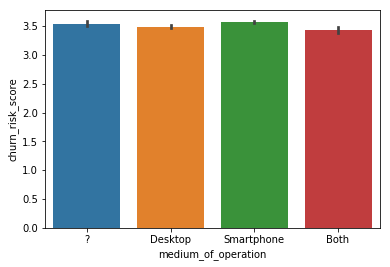

In [139]:
sns.barplot(x='medium_of_operation',y='churn_risk_score',data=dummy)

### internet_option

In [140]:
dummy = pd.DataFrame()
dummy['internet_option'] = train['internet_option']
dummy['churn_risk_score'] = train['churn_risk_score']

In [141]:
dummy['internet_option'].nunique()

3

In [142]:
dummy['internet_option'].unique()

array(['Wi-Fi', 'Mobile_Data', 'Fiber_Optic'], dtype=object)

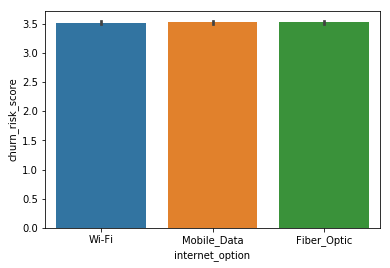

In [143]:
sns.barplot(x='internet_option',y='churn_risk_score',data=dummy)

### last_visit_time

In [144]:
dummy = pd.DataFrame()
dummy['last_visit_time'] = train['last_visit_time']
dummy['churn_risk_score'] = train['churn_risk_score']

In [145]:
dummy['last_visit_time'].nunique()

26251

In [146]:
dummy['last_visit_time'].head()

0    16:08:02
1    22:53:21
2    15:57:50
3    15:46:44
4    06:46:07
Name: last_visit_time, dtype: object

In [147]:
dummy['last_visit_time'] = pd.to_datetime(train['last_visit_time'],format ='%H:%M:%S')

In [148]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31309 entries, 0 to 31308
Data columns (total 2 columns):
last_visit_time     31309 non-null datetime64[ns]
churn_risk_score    31309 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 489.3 KB


In [149]:
dummy.head()

,last_visit_time,churn_risk_score
0,1900-01-01 16:08:02,2
1,1900-01-01 22:53:21,5
2,1900-01-01 15:57:50,5
3,1900-01-01 15:46:44,5
4,1900-01-01 06:46:07,3


In [150]:
dummy['last_visit_hours'] = dummy['last_visit_time'].dt.hour
dummy['last_visit_min'] = dummy['last_visit_time'].dt.minute
dummy['last_visit_sec'] = dummy['last_visit_time'].dt.second
dummy.head(20)

,last_visit_time,churn_risk_score,last_visit_hours,last_visit_min,last_visit_sec
0,1900-01-01 16:08:02,2,16,8,2
1,1900-01-01 22:53:21,5,22,53,21
2,1900-01-01 15:57:50,5,15,57,50
3,1900-01-01 15:46:44,5,15,46,44
4,1900-01-01 06:46:07,3,6,46,7
5,1900-01-01 11:40:04,3,11,40,4
6,1900-01-01 06:50:10,3,6,50,10
7,1900-01-01 19:10:16,4,19,10,16
8,1900-01-01 05:57:20,5,5,57,20
9,1900-01-01 11:56:11,3,11,56,11


In [151]:
dummy['last_visit_hours'].min()

0

In [152]:
dummy['last_visit_hours'].max()

23

In [153]:
dummy.corr()

,churn_risk_score,last_visit_hours,last_visit_min,last_visit_sec
churn_risk_score,1.000000,-0.008357,0.001673,-0.000964
last_visit_hours,-0.008357,1.000000,-0.005062,0.004910
last_visit_min,0.001673,-0.005062,1.000000,0.003821
last_visit_sec,-0.000964,0.004910,0.003821,1.000000


In [154]:
d1 = dummy.groupby('last_visit_hours')['churn_risk_score'].mean().to_dict()

In [155]:
d1

{0: 3.572998430141287,
 1: 3.5231586940015185,
 2: 3.4819277108433737,
 3: 3.534920634920635,
 4: 3.4858454475899006,
 5: 3.5698587127158556,
 6: 3.568372803666921,
 7: 3.5343213728549143,
 8: 3.5439266615737206,
 9: 3.5324367088607596,
 10: 3.520431765612953,
 11: 3.501853224610823,
 12: 3.5363859362224037,
 13: 3.51008215085885,
 14: 3.5,
 15: 3.513719512195122,
 16: 3.4825278810408924,
 17: 3.530102790014684,
 18: 3.507509881422925,
 19: 3.5408085430968725,
 20: 3.531296572280179,
 21: 3.5072685539403214,
 22: 3.5082335329341316,
 23: 3.4696174043510877}

### days_since_last_login

In [156]:
dummy = pd.DataFrame()
dummy['days_since_last_login'] = train['days_since_last_login']
dummy['churn_risk_score'] = train['churn_risk_score']

In [157]:
dummy.head()

,days_since_last_login,churn_risk_score
0,17,2
1,14,5
2,11,5
3,20,5
4,23,3


In [158]:
dummy.corr()

,days_since_last_login,churn_risk_score
days_since_last_login,1.000000,-0.008046
churn_risk_score,-0.008046,1.000000


In [159]:
dummy['days_since_last_login'].max()

26

In [160]:
dummy['days_since_last_login'].min()

-999

In [161]:
dummy['days_since_last_login'].nunique()

27

In [162]:
dummy['days_since_last_login'].value_counts()

 12     2023
 13     2019
 14     1945
 11     1934
 15     1907
 16     1758
 10     1737
-999    1690
 9      1562
 17     1480
 8      1327
 7      1222
 18     1218
 19     1117
 6      1079
 5      1042
 20     1003
 21      848
 4       841
 22      769
 3       725
 23      628
 2       517
 24      409
 1       270
 25      170
 26       69
Name: days_since_last_login, dtype: int64

In [163]:
train[train['days_since_last_login']==-999].head(10)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
48,fffe43004900440035003200350039003200,Jennell Wykoff,40,F,1C5WWL9,Town,Silver Membership,2017-08-21,Yes,CID15992,...,46.570000,24045.93,8.0,709.73,No,Yes,No,Not Applicable,Poor Product Quality,3
59,fffe43004900440034003600300037003000,Jena Scherrer,59,F,A3SG5HG,Town,No Membership,2017-06-08,Yes,CID8099,...,207.520000,12556.28,10.0,-44.5976,No,Yes,No,Not Applicable,No reason specified,4
62,fffe4300490044003900370038003700,Teri Johanson,53,M,G64J9NC,City,No Membership,2017-04-06,No,xxxxxxxx,...,253.960000,19233.10,25.0,1032.2,Yes,No,Yes,Solved,Poor Website,5
95,fffe43004900440033003300300032003000,Janell Stackpole,14,M,0ISW03K,Town,Basic Membership,2017-07-19,No,xxxxxxxx,...,1156.431904,32302.27,24.0,520.33,No,Yes,No,Not Applicable,Poor Customer Service,5
100,fffe43004900440035003300320036003000,Gricelda Eubanks,57,M,CZKAGUY,Town,Gold Membership,2015-08-30,Yes,CID11739,...,56.630000,10171.97,23.0,757.61,Yes,No,Yes,Solved in Follow-up,No reason specified,3
105,fffe43004900440033003200390033003300,Michelina Linley,41,M,P11WJYU,not given,Silver Membership,2016-11-25,Yes,CID29256,...,892.020000,36394.44,26.0,630.98,Yes,Yes,Yes,Unsolved,Poor Website,4
121,fffe4300490044003900360034003300,Candy Grantham,11,M,KYOLWFX,Town,Premium Membership,2015-04-23,Yes,CID26778,...,628.790000,33199.52,22.0,777.94,Yes,No,Yes,No Information Available,Poor Customer Service,3
187,fffe43004900440031003700350039003400,Rosia Fausto,15,M,LDYMHD4,City,Platinum Membership,2015-12-18,No,xxxxxxxx,...,93.760000,28456.92,5.0,704.31,No,Yes,No,Not Applicable,Poor Website,3
188,fffe43004900440033003300390032003500,Ned Strobel,30,M,WH0V4K6,City,No Membership,2015-11-06,No,xxxxxxxx,...,121.380000,13374.01,12.0,693,Yes,No,No,Not Applicable,Poor Website,5
199,fffe43004900440033003300370030003600,Tobias Owings,16,F,283BT2B,City,Silver Membership,2017-02-27,No,xxxxxxxx,...,343.130000,32605.84,16.0,335.262,No,Yes,No,Not Applicable,Poor Customer Service,4


### avg_time_spent

In [164]:
dummy = pd.DataFrame()
dummy['avg_time_spent'] = train['avg_time_spent']
dummy['churn_risk_score'] = train['churn_risk_score']

In [165]:
dummy.head()

,avg_time_spent,churn_risk_score
0,300.63,2
1,516.16,5
2,53.27,5
3,113.13,5
4,433.62,3


In [166]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31309 entries, 0 to 31308
Data columns (total 2 columns):
avg_time_spent      31309 non-null float64
churn_risk_score    31309 non-null int64
dtypes: float64(1), int64(1)
memory usage: 489.3 KB


In [167]:
dummy.describe()

,avg_time_spent,churn_risk_score
count,31309.000000,31309.000000
mean,244.017723,3.520873
std,399.424738,1.248477
min,-2814.109110,1.000000
25%,60.110000,3.000000
50%,161.370000,4.000000
75%,356.500000,5.000000
max,3235.578521,5.000000


In [168]:
dummy['avg_time_spent'].nunique()

22778

In [169]:
dummy[dummy['avg_time_spent']<0]

,avg_time_spent,churn_risk_score
35,-930.207844,5
50,-615.344319,1
98,-494.083877,1
99,-771.415609,4
173,-900.210319,5
207,-408.269352,4
243,-604.024795,3
276,-739.676575,4
278,-431.082163,3
309,-849.302012,3


In [170]:
dummy['avg_time_spent'] = np.where(dummy['avg_time_spent']<0,-(dummy['avg_time_spent']),dummy['avg_time_spent'])

In [171]:
dummy[dummy['avg_time_spent']<0]

,avg_time_spent,churn_risk_score


In [172]:
dummy.describe()

,avg_time_spent,churn_risk_score
count,31309.000000,31309.000000
mean,314.982973,3.520873
std,346.221361,1.248477
min,1.837399,1.000000
25%,75.220000,3.000000
50%,185.560000,4.000000
75%,415.990000,5.000000
max,3235.578521,5.000000


In [173]:
dummy.corr()

,avg_time_spent,churn_risk_score
avg_time_spent,1.00000,-0.02414
churn_risk_score,-0.02414,1.00000


### avg_transaction_value

In [174]:
dummy = pd.DataFrame()
dummy['avg_transaction_value'] = train['avg_transaction_value']
dummy['churn_risk_score'] = train['churn_risk_score']

In [175]:
dummy.head()

,avg_transaction_value,churn_risk_score
0,53005.25,2
1,21027.00,5
2,25239.56,5
3,24483.66,5
4,13884.77,3


In [176]:
dummy.describe()

,avg_transaction_value,churn_risk_score
count,31309.000000,31309.000000
mean,29316.021369,3.520873
std,19526.714496,1.248477
min,800.460000,1.000000
25%,14104.520000,3.000000
50%,27607.460000,4.000000
75%,40898.380000,5.000000
max,99914.050000,5.000000


In [177]:
dummy.corr()

,avg_transaction_value,churn_risk_score
avg_transaction_value,1.000000,-0.331296
churn_risk_score,-0.331296,1.000000


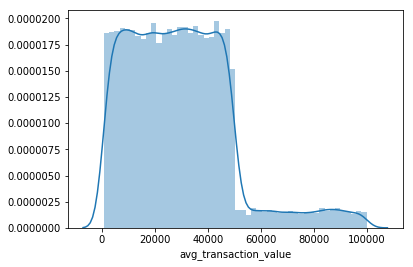

In [178]:
 sns.distplot(dummy['avg_transaction_value'])

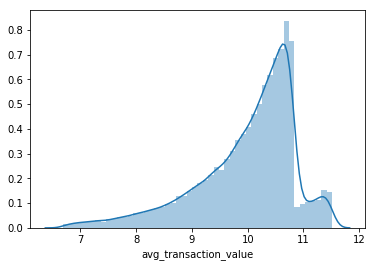

In [179]:
 sns.distplot(np.log(dummy['avg_transaction_value']))

### avg_frequency_login_days

In [180]:
dummy = pd.DataFrame()
dummy['avg_frequency_login_days'] = train['avg_frequency_login_days']
dummy['churn_risk_score'] = train['churn_risk_score']

In [181]:
dummy.head(20)


,avg_frequency_login_days,churn_risk_score
0,17.0,2
1,22.0,5
2,6.0,5
3,16.0,5
4,24.0,3
5,28.0,3
6,20.0,3
7,28.0,4
8,8.0,5
9,33.02434314076341,3


In [182]:
dummy.describe()

,churn_risk_score
count,31309.000000
mean,3.520873
std,1.248477
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [183]:
dummy['avg_frequency_login_days'] = pd.to_numeric(dummy['avg_frequency_login_days'], downcast="float",errors='coerce')

In [184]:
dummy.corr()

,avg_frequency_login_days,churn_risk_score
avg_frequency_login_days,1.000000,0.190822
churn_risk_score,0.190822,1.000000


In [185]:
dummy[dummy['avg_frequency_login_days']<0]

,avg_frequency_login_days,churn_risk_score
132,-12.714311,2
138,-1.590067,3
153,-13.646850,2
265,-5.339639,1
514,-15.725901,5
615,-4.677332,3
671,-4.265931,5
696,-3.740018,1
722,-10.414971,4
760,-8.586292,5


In [186]:
dummy.head()

,avg_frequency_login_days,churn_risk_score
0,17.0,2
1,22.0,5
2,6.0,5
3,16.0,5
4,24.0,3


In [187]:
dummy['avg_frequency_login_days'] = np.where(dummy['avg_frequency_login_days']<0,-(dummy['avg_frequency_login_days']),dummy['avg_frequency_login_days'])

In [188]:
dummy.corr()

,avg_frequency_login_days,churn_risk_score
avg_frequency_login_days,1.000000,0.201353
churn_risk_score,0.201353,1.000000


### points_in_wallet

In [189]:
dummy = pd.DataFrame()
dummy['points_in_wallet'] = train['points_in_wallet']
dummy['churn_risk_score'] = train['churn_risk_score']

In [190]:
dummy.head()

,points_in_wallet,churn_risk_score
0,781.75,2
1,500.69,5
2,567.66,5
3,663.06,5
4,722.27,3


In [191]:
dummy.describe()

,churn_risk_score
count,31309.000000
mean,3.520873
std,1.248477
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [192]:
dummy['points_in_wallet'] = pd.to_numeric(dummy['points_in_wallet'], downcast="float",errors='coerce')

In [193]:
dummy.describe()

,points_in_wallet,churn_risk_score
count,31309.000000,31309.000000
mean,622.707581,3.520873
std,271.778717,1.248477
min,-760.661255,1.000000
25%,573.679993,3.000000
50%,680.429993,4.000000
75%,757.190002,5.000000
max,2069.069824,5.000000


In [194]:
dummy[dummy['points_in_wallet']<0]

,points_in_wallet,churn_risk_score
56,-549.357483,5
59,-44.597633,4
182,-38.084312,3
530,-301.998779,1
713,-184.519592,1
783,-243.016693,3
1109,-132.423950,3
1471,-103.897980,3
1624,-8.468228,5
2028,-67.906204,4


In [195]:
dummy['points_in_wallet'] = np.where(dummy['points_in_wallet']<0,-(dummy['points_in_wallet']),dummy['points_in_wallet'])

In [196]:
dummy.corr()

,points_in_wallet,churn_risk_score
points_in_wallet,1.000000,-0.193255
churn_risk_score,-0.193255,1.000000


In [197]:
# adding average money + points

In [198]:
dummy['avg_transaction_value'] = train['avg_transaction_value']

In [199]:
dummy['total'] = dummy['avg_transaction_value'] + dummy['points_in_wallet']

In [200]:
dummy.corr()

,points_in_wallet,churn_risk_score,avg_transaction_value,total
points_in_wallet,1.000000,-0.193255,0.056078,0.069790
churn_risk_score,-0.193255,1.000000,-0.331296,-0.333668
avg_transaction_value,0.056078,-0.331296,1.000000,0.999906
total,0.069790,-0.333668,0.999906,1.000000


### used_special_discount

In [201]:
dummy = pd.DataFrame()
dummy['used_special_discount'] = train['used_special_discount']
dummy['churn_risk_score'] = train['churn_risk_score']

In [202]:
dummy.head()

,used_special_discount,churn_risk_score
0,Yes,2
1,No,5
2,No,5
3,No,5
4,Yes,3


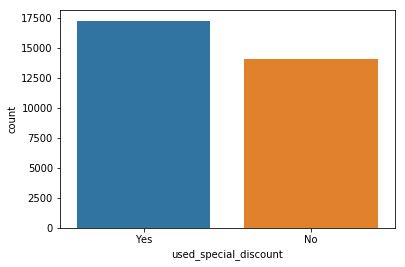

In [203]:
sns.countplot(dummy['used_special_discount'])

In [204]:
label_encoder_used_special_discount = LabelEncoder()
dummy['used_special_discount_label'] = label_encoder_used_special_discount.fit_transform(dummy['used_special_discount'])

In [205]:
dummy.corr()

,churn_risk_score,used_special_discount_label
churn_risk_score,1.000000,-0.010437
used_special_discount_label,-0.010437,1.000000


In [206]:
d1 = dummy.groupby('used_special_discount')['churn_risk_score'].sum().to_dict()

In [207]:
d1

{'No': 49724, 'Yes': 60511}

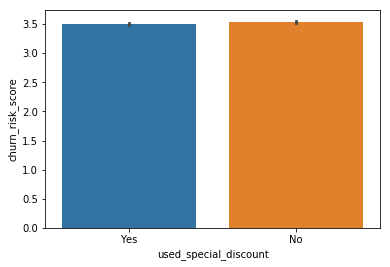

In [208]:
sns.barplot(x='used_special_discount',y='churn_risk_score',data=dummy)

In [209]:
dummy['used_special_discount_target'] = dummy['used_special_discount'].map(d1)

In [210]:
dummy.corr()

,churn_risk_score,used_special_discount_label,used_special_discount_target
churn_risk_score,1.000000,-0.010437,-0.010437
used_special_discount_label,-0.010437,1.000000,1.000000
used_special_discount_target,-0.010437,1.000000,1.000000


In [211]:
dummy['used_special_discount'].value_counts()

Yes    17244
No     14065
Name: used_special_discount, dtype: int64

In [212]:
d1=pd.DataFrame(dummy.groupby(['used_special_discount','churn_risk_score'])['churn_risk_score'].count())

In [213]:
d1

churn_risk_score
used_special_discount churn_risk_score                  
No                    1                             1465
                      2                             1027
                      3                             3871
                      4                             3918
                      5                             3784
Yes                   1                             1821
                      2                             1298
                      3                             4932
                      4                             4667
                      5                             4526

### offer_application_preference

In [214]:
dummy = pd.DataFrame()
dummy['offer_application_preference'] = train['offer_application_preference']
dummy['churn_risk_score'] = train['churn_risk_score']

In [215]:
dummy.head()

,offer_application_preference,churn_risk_score
0,Yes,2
1,Yes,5
2,Yes,5
3,Yes,5
4,No,3


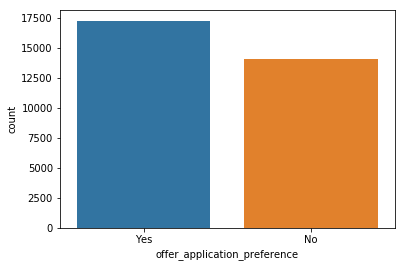

In [216]:
sns.countplot(dummy['offer_application_preference'])

In [217]:
d1=pd.DataFrame(dummy.groupby(['offer_application_preference','churn_risk_score'])['churn_risk_score'].count())

In [218]:
d1

churn_risk_score
offer_application_preference churn_risk_score                  
No                           1                             1325
                             2                              901
                             3                             4122
                             4                             3924
                             5                             3801
Yes                          1                             1961
                             2                             1424
                             3                             4681
                             4                             4661
                             5                             4509

In [219]:
label_encoder_offer_application_preference = LabelEncoder()
dummy['offer_application_preference_label'] = label_encoder_offer_application_preference.fit_transform(dummy['offer_application_preference'])

In [220]:
d1 = dummy.groupby('offer_application_preference')['churn_risk_score'].var().to_dict()

In [221]:
d1

{'No': 1.4787992699643377, 'Yes': 1.6209044084533535}

### past_complaint

In [222]:
dummy = pd.DataFrame()
dummy['past_complaint'] = train['past_complaint']
dummy['churn_risk_score'] = train['churn_risk_score']

In [223]:
dummy.head()

,past_complaint,churn_risk_score
0,No,2
1,Yes,5
2,Yes,5
3,Yes,5
4,Yes,3


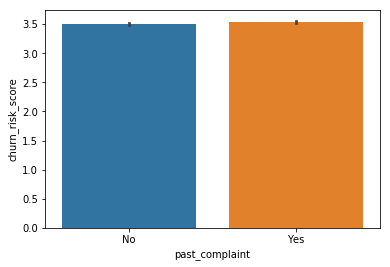

In [224]:
sns.barplot(x='past_complaint',y='churn_risk_score',data=dummy)

In [225]:
d1=pd.DataFrame(dummy.groupby(['past_complaint','churn_risk_score'])['churn_risk_score'].count())

In [226]:
d1

churn_risk_score
past_complaint churn_risk_score                  
No             1                             1720
               2                             1219
               3                             4389
               4                             4271
               5                             4162
Yes            1                             1566
               2                             1106
               3                             4414
               4                             4314
               5                             4148

In [227]:
dummy['new_target'] = 'hello'

In [228]:
dummy['new_target'] = np.where(dummy['churn_risk_score']==1,'good',dummy['new_target'])

In [229]:
dummy['new_target'] = np.where(dummy['churn_risk_score']==2,'good',dummy['new_target'])
dummy['new_target'] = np.where(dummy['churn_risk_score']==3,'avg',dummy['new_target'])
dummy['new_target'] = np.where(dummy['churn_risk_score']==4,'bad',dummy['new_target'])
dummy['new_target'] = np.where(dummy['churn_risk_score']==5,'bad',dummy['new_target'])

In [230]:
dummy[['new_target','churn_risk_score']].head()

,new_target,churn_risk_score
0,good,2
1,bad,5
2,bad,5
3,bad,5
4,avg,3


In [231]:
d1=pd.DataFrame(dummy.groupby(['past_complaint','new_target'])['new_target'].count())

In [232]:
d1

new_target
past_complaint new_target            
No             avg               4389
               bad               8433
               good              2939
Yes            avg               4414
               bad               8462
               good              2672

###  complaint_status

In [233]:
dummy = pd.DataFrame()
dummy['complaint_status'] = train['complaint_status']
dummy['churn_risk_score'] = train['churn_risk_score']

In [234]:
dummy.head()

,complaint_status,churn_risk_score
0,Not Applicable,2
1,Solved in Follow-up,5
2,Unsolved,5
3,Solved,5
4,Unsolved,3


In [242]:
d1=pd.DataFrame(dummy.groupby(['complaint_status','churn_risk_score'])['churn_risk_score'].count())

In [244]:
d2=pd.DataFrame(dummy.groupby(['complaint_status'])['churn_risk_score'].count())/

In [246]:
d1

churn_risk_score
complaint_status         churn_risk_score                  
No Information Available 1                              392
                         2                              256
                         3                             1094
                         4                             1090
                         5                              998
Not Applicable           1                             1720
                         2                             1219
                         3                             4389
                         4                             4271
                         5                             4162
Solved                   1                              399
                         2                              289
                         3                             1091
                         4                             1050
                         5                             1083
Solved in Follow-up      1                              369
                         2                              270
                         3                             1118
                         4                             1098
                         5                             1003
Unsolved                 1                              406
                         2                              291
                         3                             1111
                         4                             1076
                         5                             1064